In [1]:
# You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

# conda install lxml
# conda install html5lib
# conda install BeautifulSoup4
# Then restart Jupyter Notebook. (or use pip install if you aren't using the Anaconda Distribution)

import numpy as np
import pandas as pd
import os.path
from datetime import datetime, timedelta

one_hour_ago = datetime.now() - timedelta(hours=1)
if os.path.exists("history.csv"):
    filetime = datetime.fromtimestamp(os.path.getctime("history.csv"))
    if filetime < one_hour_ago:
        histdata = pd.read_html("https://www.biopharmcatalyst.com/calendars/historical-catalyst-calendar")
        histdata[0].to_csv('history.csv',index=False)
else:
    histdata = pd.read_html("https://www.biopharmcatalyst.com/calendars/historical-catalyst-calendar")
    histdata[0].to_csv('history.csv',index=False)

df = pd.read_csv('history.csv').set_index('Ticker')
df.index.name=None

df[["Date","Catalyst"]] = df.Catalyst.str.extract('(?P<Date>[0-9]{2}\/[0-9]{2}\/[0-9]{4})(?P<Catalyst>.*)', expand=True)

df.loc["OCUL"]


,Drug,Stage,Catalyst,Date
OCUL,DEXTENZA Allergic conjunctivitis,Phase 3,Phase 3 trial did not meet primary endpoint ...,06/06/2016
OCUL,DEXTENZA Ocular inflammation and pain followi...,PDUFA,CRL July 25 2016 - due to manufacturing defi...,07/25/2016
OCUL,DEXTENZA Ocular inflammation and pain followi...,PDUFA,CRL July 25 2016 - due to manufacturing defi...,07/11/2017


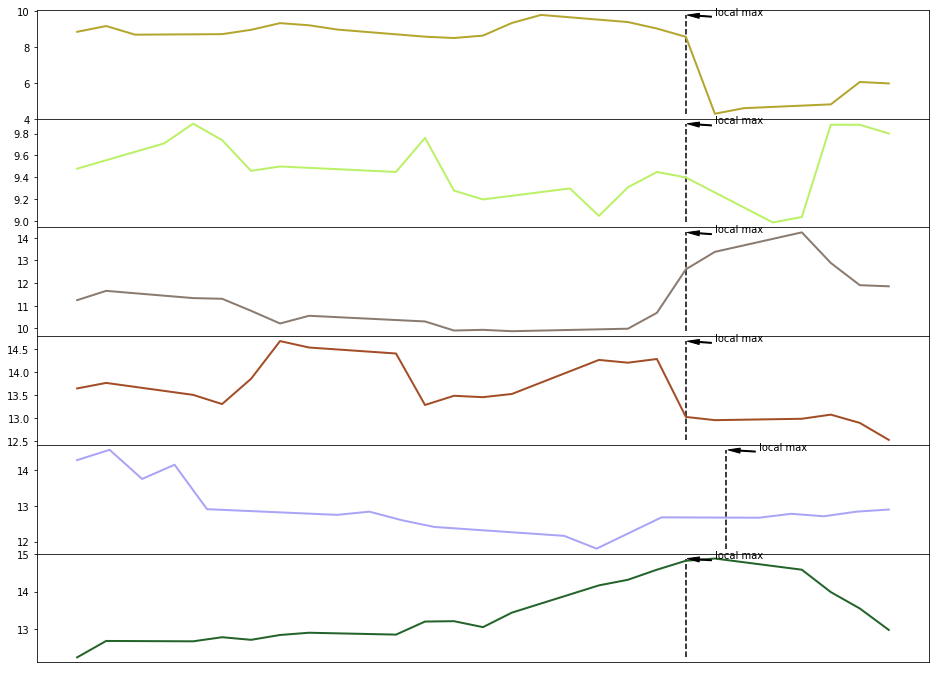

In [414]:
# You may need to install htmllib5,lxml, and BeautifulSoup4. In your terminal/command prompt run:

# conda install lxml
# conda install html5lib
# conda install BeautifulSoup4
# Then restart Jupyter Notebook. (or use pip install if you aren't using the Anaconda Distribution)
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import *
import quandl

# Quandl API key
quandl.ApiConfig.api_key = "UsYsv7dKGxHHQ5oURP4B"

# Some formatting
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_seq_items', 2)

# Only pull fresh PDUFA data
three_weeks_ago = relativedelta(weeks=3)
one_week_ahead = relativedelta(weeks=1)
one_hour_ago = datetime.now() - timedelta(hours=1)
if os.path.exists("history.csv"):
    filetime = datetime.fromtimestamp(os.path.getctime("history.csv"))
    if filetime < one_hour_ago:
        histdata = pd.read_html("https://www.biopharmcatalyst.com/calendars/historical-catalyst-calendar")
        histdata[0].to_csv('history.csv',index=False)
else:
    histdata = pd.read_html("https://www.biopharmcatalyst.com/calendars/historical-catalyst-calendar")
    histdata[0].to_csv('history.csv',index=False)

# Create dataframe
df = pd.read_csv('history.csv').set_index('Ticker')
df.index.name=None
df[["Date","Catalyst"]] = df.Catalyst.str.extract('(?P<Date>[0-9]{2}\/[0-9]{2}\/[0-9]{4})(?P<Catalyst>.*)', expand=True)
df['Date'] = pd.to_datetime(df['Date'])
df["Past"] = df["Date"] - DateOffset(weeks=3)
df["Future"] = df["Date"] + DateOffset(weeks=1)

# Set stock ticker
stockpick="HALO"
dataset=str(f"WIKI/{stockpick}")
# Set variables for plot creation
length = len(df.loc[stockpick].index)
count = 0
fig, axes = plt.subplots(nrows=length, ncols=1,figsize=(16,length * 2))
fig.subplots_adjust(hspace=0, wspace=0)
allplots=[]

# Combine all data together into list of dataframes, iterate through each part of the list, plot each frame.
while (count < length):
    pasttime= df.loc[stockpick].iloc[count]["Past"]
    futuretime= df.loc[stockpick].iloc[count]["Future"]
    pdufa=df.loc[stockpick].iloc[count]["Date"]
    annotate = df.loc[stockpick].iloc[count]["Date"] + timedelta(days=1)

    mydata = quandl.get(dataset,start_date=pasttime,end_date=futuretime)
    allplots.append(mydata)
    axes[count].annotate('local max', xy=(pdufa, allplots[count]["Close"].max()), xytext=(annotate, allplots[count]["Close"].max()),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),)
    axes[count].vlines(pdufa, allplots[count]["Close"].min(), allplots[count]["Close"].max(), linestyle="--", color='black')
    axes[count].plot(allplots[count].index,allplots[count]["Close"],c=np.random.rand(3,), lw=2) 
    axes[count].axes.get_xaxis().set_visible(False) # remove x axis
    count = count + 1
plt.show()

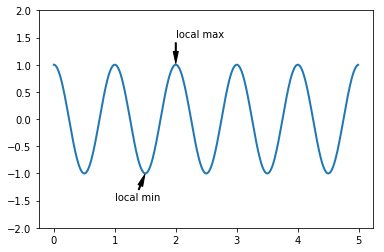

In [393]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            )

ax.annotate('local min', xy=(1.5, -1), xytext=(1, -1.5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            )

ax.set_ylim(-2,2)
plt.show()